# Motivation

Knowledge of income of an individual may influence various companies to plan their future games accordingly. For instance, if a bank is interested in introducing a certain type of credit card or giving a certain kind of loan to a customer, it may interested in individuals having higher income segmemt. With this motivation I'm planning to build some tree based models due to its flexibility which predicts whether a person's income is less than 50,000 or greater than 50,000 based on certain features. 

# Table of Contents
1. [Dataset exploration](#section_1)
 - [Importing the dataset](#section_1_1)
 - [Assigning column names](#section_1_2)
 - [Dimension of the dataset](#section_1_3)
 - [Datatypes of the features](#section_1_4)
2. [Feature engineering](#section_2)
 - [Droping columns which are redundant](#section_2_1)
 - [Checking for apparent missing values](#section_2_2)
 - [Checking if any other type missing value is present](#section_2_3)
     + [Finding the form by which missing value is present](#section_2_3_1)
         + [For 'workclass' feature](#section_2_3_1_1)
         + [For 'occupation' feature](#section_2_3_1_2)
         + [For 'native-country' feature](#section_2_3_1_3)
     + [Replacing the missing value by NaN values](#section_2_3_2)
     + [Missing value visualization by heatmap](#section_2_3_3)
     + [Number of missing values in each column](#section_2_3_4)
  - [Dataset without any missing values](#section_2_4)
      + [Shape of the cleaned dataset](#section_2_4_1)   
  - [Dealing with mising values for categorical features](#section_2_5)   
      + [Replace 'workclass' and 'native-country' with the mode value](#section_2_5_1)   
      + [Missing value imputation of 'occupation' feature using Random Forest classifier](#section_2_5_2)   
          + [Converting categorical variable into dummy/indicator variables of size total number of catagories less by 1](#section_2_5_2_1)
          +[One Hot Encoding](#section_2_5_2_2)
          + [Splitting dataset into train and test in accordance with presence of missing values](#section_2_5_2_3)
          + [Applying Random forest classifier](#section_2_5_2_4)
      + [Constructing our final dataframe for further analysis](#section_2_5_3)
   - [Checking if our dataset is imbalanced](#section_2_6)
       + [SMOTENC](#section_2_6_1)
3. [Logistic Regression](#section_3)
    - [Splitting the dataset into training set and testing set](#section_3_1)
    - [Applying Logistic Regression with the default hyperparameter setting and checking the accuracy](#section_3_2) 
4. [Random Forest](#section_4)
    - [Splitting the dataset into training set and testing set](#section_4_1)
    - [Applying Random forest with the default hyperparameter setting and checking the accuracy](#section_4_2)
    - [Hyperparameter tuning to get better accuracy](#section_4_3)
        + [Hyperparameter combinations with the mean test scores](#section_4_3_1)
        + [Best set of hyperparameters](#section_4_3_2)
    - [Optimal Random Forest Model and its accuracy](#section_4_4)
    - [Feature Importance](#section_4_5)
5. [XGBoost](#section_5)
    - [Hyperparameter tuning](#section_5_1)
        + [Hyperparameter combinations with the mean test scores](#section_5_1_1)
        + [Best set of hyperparameters](#section_5_1_2)
    - [Optimal Random Forest Model and its accuracy](#section_5_2)
6. [Conclusion](#section_6)

# Dataset exploration <a class="anchor" id="section_1"></a>
## Importing the dataset <a class="anchor" id="section_1_1"></a>
The dataset is fetched from the website [link](https://archive.ics.uci.edu/ml/datasets/Census+Income) and our data looks like this.

## Importing the dataset 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
# reading from the file
df = pd.read_csv("adult.data", header = None, skipinitialspace=True, sep = ',')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Assigning column names <a class="anchor" id="section_1_2"></a>

In [2]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native country','class']
df

,age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


* age: the age of an individual
* workclass: employment status of an individual
* fnlwgt: final weight. In other words this is the number of people the census believes the entry represents.
* education: the highest level of education achieved by an individual.

* education-num: the highest level of education achieved in numerical form.

* marital-status: marital status of an individual. Note: Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.

* occupation: the general type of occupation of an individual

* relationship: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status.

* race: Descriptions of an individual’s race

* sex: the biological sex of the individual

* capital-gain: capital gains for an individual (money gained outside of salary)

* capital-loss: capital loss for an individual (money lost outside of salary)

* hours-per-week: the hours an individual has reported to work per week

* native-country: country of origin for an individual

* income: whether or not an individual makes more than 50,000 annually.

## Dimension of the project <a class="anchor" id="section_1_3"></a>

In [3]:
df.shape

(32561, 15)

## Datatypes of features <a class="anchor" id="section_1_4"></a>

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native country    object
class             object
dtype: object

## Feature engineering <a class="anchor" id="section_2"></a>
## Droping columns which are redundant <a class="anchor" id="section_2_1"></a>
Education status is alreeady given in 'education' column and 'education-num' is just its ordered numerical version. So, we are dropping that feature.

### Droping duplicate columns

Education status is already given. Education-num is just it's ordered numerical version. So we are dropping this feature.

In [5]:
df = df.drop(['education-num'],axis = 1)

In [6]:
df

,age,workclass,fnlwgt,education,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Checking for apparent missing values <a class="anchor" id="section_2_2"></a>

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native country    0
class             0
dtype: int64

Apparently there is no missing value present in our data.

## Checking if any other type missing value is present <a class="anchor" id="section_2_3"></a>

In [8]:
def null_columns(c):
    if(df.astype(str)[c].str.find('?' or '' or 'NaN' or 'nan' or 'Null' or 'null')+1).sum()!=0:
        return ('yes')
    else:
        return('no')
for i in df.astype(str).columns:
        print('Does' +i+ '\t contain any missing value?\t' +null_columns(i)+'\n')

Doesage	 contain any missing value?	no

Doesworkclass	 contain any missing value?	yes

Doesfnlwgt	 contain any missing value?	no

Doeseducation	 contain any missing value?	no

Doesmarital status	 contain any missing value?	no

Doesoccupation	 contain any missing value?	yes

Doesrelationship	 contain any missing value?	no

Doesrace	 contain any missing value?	no

Doessex	 contain any missing value?	no

Doescapital-gain	 contain any missing value?	no

Doescapital-loss	 contain any missing value?	no

Doeshours-per-week	 contain any missing value?	no

Doesnative country	 contain any missing value?	yes

Doesclass	 contain any missing value?	no



So we have missing values for the features 'workclass','occupation' and native-country.

### Finding the form by which missing value is present<a class="anchor" id="section_2_3_1"></a>
#### For 'workclass' feature <a class="anchor" id="section_2_3_1_1"></a>

In [15]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

#### occupation feature <a class="anchor" id="section_2_3_1_2"></a>

In [16]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

#### native-country feature <a class="anchor" id="section_2_3_1_3"></a>

In [17]:
df['native country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

### Replacing the missing value by NaN values <a class="anchor" id="section_2_3_2"></a>

In [13]:
df.loc[:,'workclass'].replace('?',np.NaN,inplace = True)
df.loc[:,'occupation'].replace('?',np.NaN,inplace = True)
df.loc[:,'native country'].replace('?',np.NaN,inplace = True)

### Missing value visualization by heatmap <a class="anchor" id="section_2_3_3"></a>

In [ ]:
import plotly.express as px
px.imshow(df.isnull())

### Number of missing values in each column <a class="anchor" id="section_2_3_4"></a>

In [14]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
marital status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native country     583
class                0
dtype: int64

## Dataset without any missing values <a class="anchor" id="section_2_4"></a>

In [18]:
df_clean = df.dropna()
df_clean

,age,workclass,fnlwgt,education,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Shape of the cleaned dataset <a class="anchor" id="section_2_4_1"></a>

In [19]:
df_clean.shape

(30162, 14)

In [20]:
df_clean.describe

<bound method NDFrame.describe of        age         workclass  fnlwgt   education      marital status  \
0       39         State-gov   77516   Bachelors       Never-married   
1       50  Self-emp-not-inc   83311   Bachelors  Married-civ-spouse   
2       38           Private  215646     HS-grad            Divorced   
3       53           Private  234721        11th  Married-civ-spouse   
4       28           Private  338409   Bachelors  Married-civ-spouse   
...    ...               ...     ...         ...                 ...   
32556   27           Private  257302  Assoc-acdm  Married-civ-spouse   
32557   40           Private  154374     HS-grad  Married-civ-spouse   
32558   58           Private  151910     HS-grad             Widowed   
32559   22           Private  201490     HS-grad       Never-married   
32560   52      Self-emp-inc  287927     HS-grad  Married-civ-spouse   

              occupation   relationship   race     sex  capital-gain  \
0           Adm-clerical  Not

## Dealing with mising values for categorical features <a class="anchor" id="section_2_5"></a>
### Replace 'workclass' and 'native-country' with the mode value <a class="anchor" id="section_2_5_1"></a>
We are doing this as it seems reasonable from the histogram to replace the 'NaN' values with the mode value for those variables.

In [21]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [22]:
import matplotlib.pyplot as plt

In [23]:
new_df = pd.DataFrame(df['workclass'])

In [24]:
new_df

,workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private
...,...
32556,Private
32557,Private
32558,Private
32559,Private


In [25]:
freq_dist = new_df['workclass'].value_counts()

In [26]:
freq_dist

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

<BarContainer object of 8 artists>

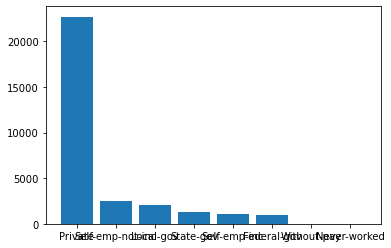

In [27]:
plt.bar(freq_dist.index,freq_dist.values)

In [28]:
df['workclass'] = df['workclass'].fillna(value = 'Private')

In [29]:
freq = df['native country'].value_counts()

In [25]:
freq

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [30]:
df['native country'] = df['native country'].fillna(value = 'United-States')

In [31]:
freq1 = df['occupation'].value_counts()

In [32]:
freq1

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

But we can't do the same for occupation as it is not suitable to replace the NaN value with mode value. So we deal with this problem and apply Random Forest Classifier to replace NaN values. For this first we will train our model using the dataset without any missing values and try to predict the missing values of the test dataset applying this model. 

### Missing value imputation of 'occupation' feature using Random Forest classifier <a class="anchor" id="section_2_5_2"></a>

#### Converting categorical variable into dummy/indicator variables of size total number of catagories less by 1 <a class="anchor" id="section_2_5_2_1"></a>
Let's first select only the categorical variables

In [33]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native country    object
class             object
dtype: object

In [34]:
df.select_dtypes(include = 'object').columns

Index(['workclass', 'education', 'marital status', 'occupation',
       'relationship', 'race', 'sex', 'native country', 'class'],
      dtype='object')

We will convert the categorical variables except class variables to dummy variables using One-Hot Encoding as the Bagging and Boosting algorithms doesn't support categorical variables.

### One-Hot encoding <a class="anchor" id="section_2_5_2_2"></a>

In [35]:
df_encoded = pd.get_dummies(df.drop(columns ='class'),columns = ['workclass','education','marital status','relationship',
                                                                'race','sex','native country'],drop_first = True)

In [36]:
df_encoded

,age,fnlwgt,occupation,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native country_Portugal,native country_Puerto-Rico,native country_Scotland,native country_South,native country_Taiwan,native country_Thailand,native country_Trinadad&Tobago,native country_United-States,native country_Vietnam,native country_Yugoslavia
0,39,77516,Adm-clerical,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,Exec-managerial,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,Handlers-cleaners,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,Handlers-cleaners,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,Prof-specialty,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Tech-support,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,Machine-op-inspct,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,Adm-clerical,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,Adm-clerical,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Splitting the dataset into train and test on accordance with presence of missing values <a class="anchor" id="section_2_5_2_3"></a>

##### Train Data

In [37]:
df_train = df_encoded.dropna()
df_train

,age,fnlwgt,occupation,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native country_Portugal,native country_Puerto-Rico,native country_Scotland,native country_South,native country_Taiwan,native country_Thailand,native country_Trinadad&Tobago,native country_United-States,native country_Vietnam,native country_Yugoslavia
0,39,77516,Adm-clerical,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,Exec-managerial,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,Handlers-cleaners,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,Handlers-cleaners,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,Prof-specialty,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Tech-support,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,Machine-op-inspct,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,Adm-clerical,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,Adm-clerical,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Test data 

In [38]:
df_test = df_encoded[df_encoded.isnull().any(axis = 1)]

In [39]:
df_test

,age,fnlwgt,occupation,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native country_Portugal,native country_Puerto-Rico,native country_Scotland,native country_South,native country_Taiwan,native country_Thailand,native country_Trinadad&Tobago,native country_United-States,native country_Vietnam,native country_Yugoslavia
27,54,180211,NaN,0,0,60,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
61,32,293936,NaN,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
69,25,200681,NaN,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
77,67,212759,NaN,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
106,17,304873,NaN,34095,0,32,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,320084,NaN,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32531,30,33811,NaN,0,0,99,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32539,71,287372,NaN,0,0,10,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32541,41,202822,NaN,0,0,32,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Defining response and predictors for the training data set 

In [40]:
df_x_train = df_train.drop(columns = ['occupation'])
df_y_train = df_train['occupation']

#### Defining predictors for the testing data set 

In [41]:
df_x_test = df_test.drop(columns = ['occupation'])

#### Applying Random Forest Classifier <a class="anchor" id="section_2_5_2_4"></a>

In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#Fitting the model
model.fit(df_x_train,df_y_train)

RandomForestClassifier()

In [43]:
y_pred = model.predict(df_x_test)

In [46]:
y_pred

array(['Exec-managerial', 'Craft-repair', 'Transport-moving', ...,
       'Prof-specialty', 'Adm-clerical', 'Sales'], dtype=object)

In [45]:
df_x_test

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native country_Portugal,native country_Puerto-Rico,native country_Scotland,native country_South,native country_Taiwan,native country_Thailand,native country_Trinadad&Tobago,native country_United-States,native country_Vietnam,native country_Yugoslavia
27,54,180211,0,0,60,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
61,32,293936,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
69,25,200681,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
77,67,212759,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
106,17,304873,34095,0,32,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,320084,0,0,55,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32531,30,33811,0,0,99,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32539,71,287372,0,0,10,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32541,41,202822,0,0,32,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
#Hiding warning masseges for the outputs
import warnings
warnings.filterwarnings('ignore')

#### Assigning predicted values into the test data  

In [48]:
df_test['occupation'] = y_pred

### Constructing our final dataframe for further analysis <a class="anchor" id="section_2_5_3"></a>

In [49]:
#concatenating train and test data set into one data set
df_final = pd.concat([df_train,df_test])
df_final


,age,fnlwgt,occupation,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native country_Portugal,native country_Puerto-Rico,native country_Scotland,native country_South,native country_Taiwan,native country_Thailand,native country_Trinadad&Tobago,native country_United-States,native country_Vietnam,native country_Yugoslavia
0,39,77516,Adm-clerical,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,Exec-managerial,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,Handlers-cleaners,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,Handlers-cleaners,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,Prof-specialty,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,320084,Prof-specialty,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32531,30,33811,Prof-specialty,0,0,99,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32539,71,287372,Prof-specialty,0,0,10,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32541,41,202822,Adm-clerical,0,0,32,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
df_final = df_final.drop(columns = df_final.columns[6:])
df_final

,age,fnlwgt,occupation,capital-gain,capital-loss,hours-per-week
0,39,77516,Adm-clerical,2174,0,40
1,50,83311,Exec-managerial,0,0,13
2,38,215646,Handlers-cleaners,0,0,40
3,53,234721,Handlers-cleaners,0,0,40
4,28,338409,Prof-specialty,0,0,40
...,...,...,...,...,...,...
32530,35,320084,Prof-specialty,0,0,55
32531,30,33811,Prof-specialty,0,0,99
32539,71,287372,Prof-specialty,0,0,10
32541,41,202822,Adm-clerical,0,0,32


In [51]:
df_final.dtypes

age                int64
fnlwgt             int64
occupation        object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object

In [52]:
df_final[[element for element in df.select_dtypes(include = 'object').columns if element != 'occupation' ]] = df[[element for element in df.select_dtypes(include = 'object').columns if element != 'occupation']]
df_final

,age,fnlwgt,occupation,capital-gain,capital-loss,hours-per-week,workclass,education,marital status,relationship,race,sex,native country,class
0,39,77516,Adm-clerical,2174,0,40,State-gov,Bachelors,Never-married,Not-in-family,White,Male,United-States,<=50K
1,50,83311,Exec-managerial,0,0,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,White,Male,United-States,<=50K
2,38,215646,Handlers-cleaners,0,0,40,Private,HS-grad,Divorced,Not-in-family,White,Male,United-States,<=50K
3,53,234721,Handlers-cleaners,0,0,40,Private,11th,Married-civ-spouse,Husband,Black,Male,United-States,<=50K
4,28,338409,Prof-specialty,0,0,40,Private,Bachelors,Married-civ-spouse,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,320084,Prof-specialty,0,0,55,Private,Bachelors,Married-civ-spouse,Wife,White,Female,United-States,>50K
32531,30,33811,Prof-specialty,0,0,99,Private,Bachelors,Never-married,Not-in-family,Asian-Pac-Islander,Female,United-States,<=50K
32539,71,287372,Prof-specialty,0,0,10,Private,Doctorate,Married-civ-spouse,Husband,White,Male,United-States,>50K
32541,41,202822,Adm-clerical,0,0,32,Private,HS-grad,Separated,Not-in-family,Black,Female,United-States,<=50K


## Checking if our dataset is imbalanced <a class="anchor" id="section_2_6"></a>

In [53]:
df_final['class'].value_counts()

<=50K    24720
>50K      7841
Name: class, dtype: int64

So, our dataset has presence of skewed class proportions which may affect the classification algorithm in the sense that all predictions may go to majority class. 
While our **SMOTE** approach does not handle data sets with all nominal features, it is generalized to handle mixed datasets of continuous and nominal features. We call this approach *Synthetic Minority Over-sampling Technique-Nominal Continuous* or **SMOTE-NC**. The SMOTE-NC algorithm is described below.
1. *Median computation:* 
The algorithm calculates the standard deviation for all continuous attributes in the minority class, and then computes the median value of the standard deviations.
2. *Nearest neighbor computation:* 
The metric used for the k-nearest neighbours selection is calculated using the Euclidean distance, with an added correction for any mismatching categorical attributes. For every categorical attribute that differs between the selected minority member and a potential neighbour, the pre-computed median is added as a component to the Euclidean distance calculation.
3. *Synthetic sample correction:*
The continuous features of the new synthetic minority
class sample are created using the same approach of SMOTE. The
nominal feature is given the value occuring in the majority of the k-nearest neighbors.

## SMOTENC <a class="anchor" id="section_2_6_1"></a>

In [51]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
from imblearn.over_sampling import SMOTENC
smote=SMOTENC(categorical_features=[df_final.columns.get_loc(c) for c in df_final.select_dtypes(include='object').columns[:-1]], random_state=40)
df_final_data_sm, df_final_target_sm=smote.fit_resample(df_final.drop(columns=['class']),df_final['class']) 


#### FInal Target and Predictor variables <a class="anchor" id="section_2_6_1_1"></a>
Also we convert categorical variable into dummy/indicator variables of size total number of catagories less by 1

In [57]:
# Fixing target variable and assigning 0 and 1 for categories '<= 50K' and '>50K' respectively
df_final_target_sm = df_final_target_sm.replace(['<=50K','>50K'],[0,1])
#Gathering the target variables
df_final_data_sm = pd.get_dummies(df_final_data_sm,columns = [element for element in df_final_data_sm.select_dtypes(include = 'object').columns if element !='class'],drop_first=True)

In [58]:
df_final_target_sm

0        0
1        0
2        0
3        0
4        0
        ..
49435    1
49436    1
49437    1
49438    1
49439    1
Name: class, Length: 49440, dtype: int64

In [59]:
df_final_data_sm

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,...,native country_Portugal,native country_Puerto-Rico,native country_Scotland,native country_South,native country_Taiwan,native country_Thailand,native country_Trinadad&Tobago,native country_United-States,native country_Vietnam,native country_Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,57,159322,0,0,49,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
49436,50,108429,0,0,78,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49437,32,202614,0,0,46,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49438,33,207201,0,0,42,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Logistic Regression <a class="anchor" id="section_3"></a>
## Splitting the dataset into training set and testing set <a class="anchor" id="section_3_1"></a>
We have split the whole dataset into the training and testing dataset such that 30% of the whle dataset goes into the testing part. We have passed the value 42 for random_state so that everytime we can get the same train-test spliting. And also we have done this splitting using sratification in order to maintain same percentage of people who have income class $>$ 50 in both training and testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(df_final_data_sm,df_final_target_sm,test_size=0.25,random_state=42,stratify=df_final_target_sm)

## Applying Logistic Regression with the default hyperparameter setting and checking the accuracy <a class="anchor" id="section_3_2"></a>

In [93]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=42)

In [94]:
accuracy_score(y_train,log_classifier.fit(x_train,y_train).predict(x_train))

0.6137540453074434

In [95]:
accuracy_score(y_test,log_classifier.fit(x_train,y_train).predict(x_test))

0.6146440129449838

Logistic regression performs very worst in this case

## Random Forest <a class="anchor" id="section_4"></a> 

## Splitting the dataset into training set and testing set <a class="anchor" id="section_4_1"></a>

We have splitted the dataset into the training and testing dataset such that 25% of the dataset goes into the testing part. We have passed the value 42 for random_state so that everytime we can get the same train test splitting. And also we have done this splitting using stratification in order to maintain same percentage of categories in training and testing dataset. 

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_final_data_sm,df_final_target_sm,test_size = 0.25,random_state=42,stratify=df_final_target_sm)

## Applying Random forest with the default hyperparameter setting and checking the accuracy <a class="anchor" id="section_4_2"></a>

### For train data 

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_train,model.fit(x_train,y_train).predict(x_train))

0.9999730312837108

### For test data 

In [63]:
accuracy_score(y_test,model.fit(x_train,y_train).predict(x_test))

0.8858414239482201

We can see that approx 99.99% of the train dataset is correctly classified whereas for test dataset the accuracy is approx 88% which potrays that our model is overfitting to the train data.

#### Confusion  matrix

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

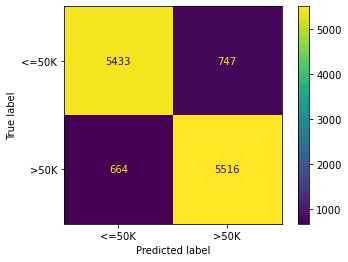

In [65]:
plot_confusion_matrix(model,x_test,y_test,display_labels=['<=50K','>50K'])

## Hyperparameter tuning to get better accuracy  <a class="anchor" id="section_4_3"></a>
There are a few hyperparameter values that we have decided to check for. For instance, we have the number of trees to build a random forest classifier as 100,200,300,400 and 500. In the same way we have given some possibe values for other hyperparameters and used *RandomizedSearchCV* to randomly choose 25 hyperparameter combinations and 5-fold cross-validation to make the final conclusion.
Here,
- n_estimators : The number of trees in the forest
- min_samples_split : The minimum number of samples required to split an internal node
- min_impurity_decrease : A node will be split if this split induces a decrease of the impurity greater than or equal to this value. 

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
hyp_par = RandomizedSearchCV(model,{
    'n_estimators':range(100,500,100),
    'min_samples_split':range(2,20,2),
    'min_impurity_decrease':np.arange(0,0.8,0.2)
},cv = 5,return_train_score=False,n_iter = 25,random_state=True)
hyp_par.fit(df_final_data_sm,df_final_target_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'min_impurity_decrease': array([0. , 0.2, 0.4, 0.6]),
                                        'min_samples_split': range(2, 20, 2),
                                        'n_estimators': range(100, 500, 100)},
                   random_state=True)

#### Hyperparameter combinations with the mean test scores <a class="anchor" id="section_4_3_1"></a>

In [68]:
pd.DataFrame(hyp_par.cv_results_)[['param_n_estimators','param_min_samples_split','param_min_impurity_decrease','mean_test_score']]

,param_n_estimators,param_min_samples_split,param_min_impurity_decrease,mean_test_score
0,300,12,0.4,0.500000
1,400,10,0.4,0.500000
2,100,8,0.4,0.500000
3,100,8,0.2,0.607767
4,200,10,0.2,0.607767
5,200,4,0.0,0.877609
6,300,4,0.2,0.607767
7,200,18,0.0,0.880259
8,100,4,0.6,0.500000
9,100,2,0.6,0.500000


#### Best set of hyperparameters <a class="anchor" id="section_4_3_2"></a>

In [69]:
hyp_par.best_params_

{'n_estimators': 400, 'min_samples_split': 10, 'min_impurity_decrease': 0.0}

## Optimal Random Forest Model and its accuracy <a class="anchor" id="section_4_4"></a>

In [70]:
opt_model = RandomForestClassifier(n_estimators=400,min_samples_split=10,min_impurity_decrease=0.0)

#### Accuracy for train data 

In [71]:
accuracy_score(y_train,opt_model.fit(x_train,y_train).predict(x_train))

0.9441747572815534

#### Accuracy for test data 

In [72]:
accuracy_score(y_test,opt_model.fit(x_train,y_train).predict(x_test))

0.8892394822006473

### Confusion matrix for the optimal model 

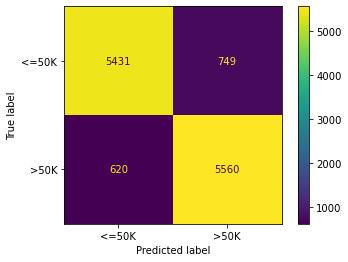

In [73]:
plot_confusion_matrix(opt_model,x_test,y_test,display_labels=['<=50K','>50K'])

The model is slightly better than the previous. For example, of the 6180 people having the income > 50K approx 89.6% are correctly classified whereas for the previous model it was approx 88.9%

## Feature Importance <a class="anchor" id="section_4_5"></a>

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
#View the feature scores
feature_scores = pd.Series(opt_model.fit(x_train,y_train).feature_importances_,index = x_train.columns).sort_values(ascending = False)
print(feature_scores)

marital status_Married-civ-spouse            0.183560
age                                          0.119531
hours-per-week                               0.088425
fnlwgt                                       0.064842
capital-gain                                 0.063866
                                               ...   
native country_Outlying-US(Guam-USVI-etc)    0.000021
occupation_Armed-Forces                      0.000010
workclass_Never-worked                       0.000003
native country_Honduras                      0.000003
native country_Holand-Netherlands            0.000000
Length: 96, dtype: float64


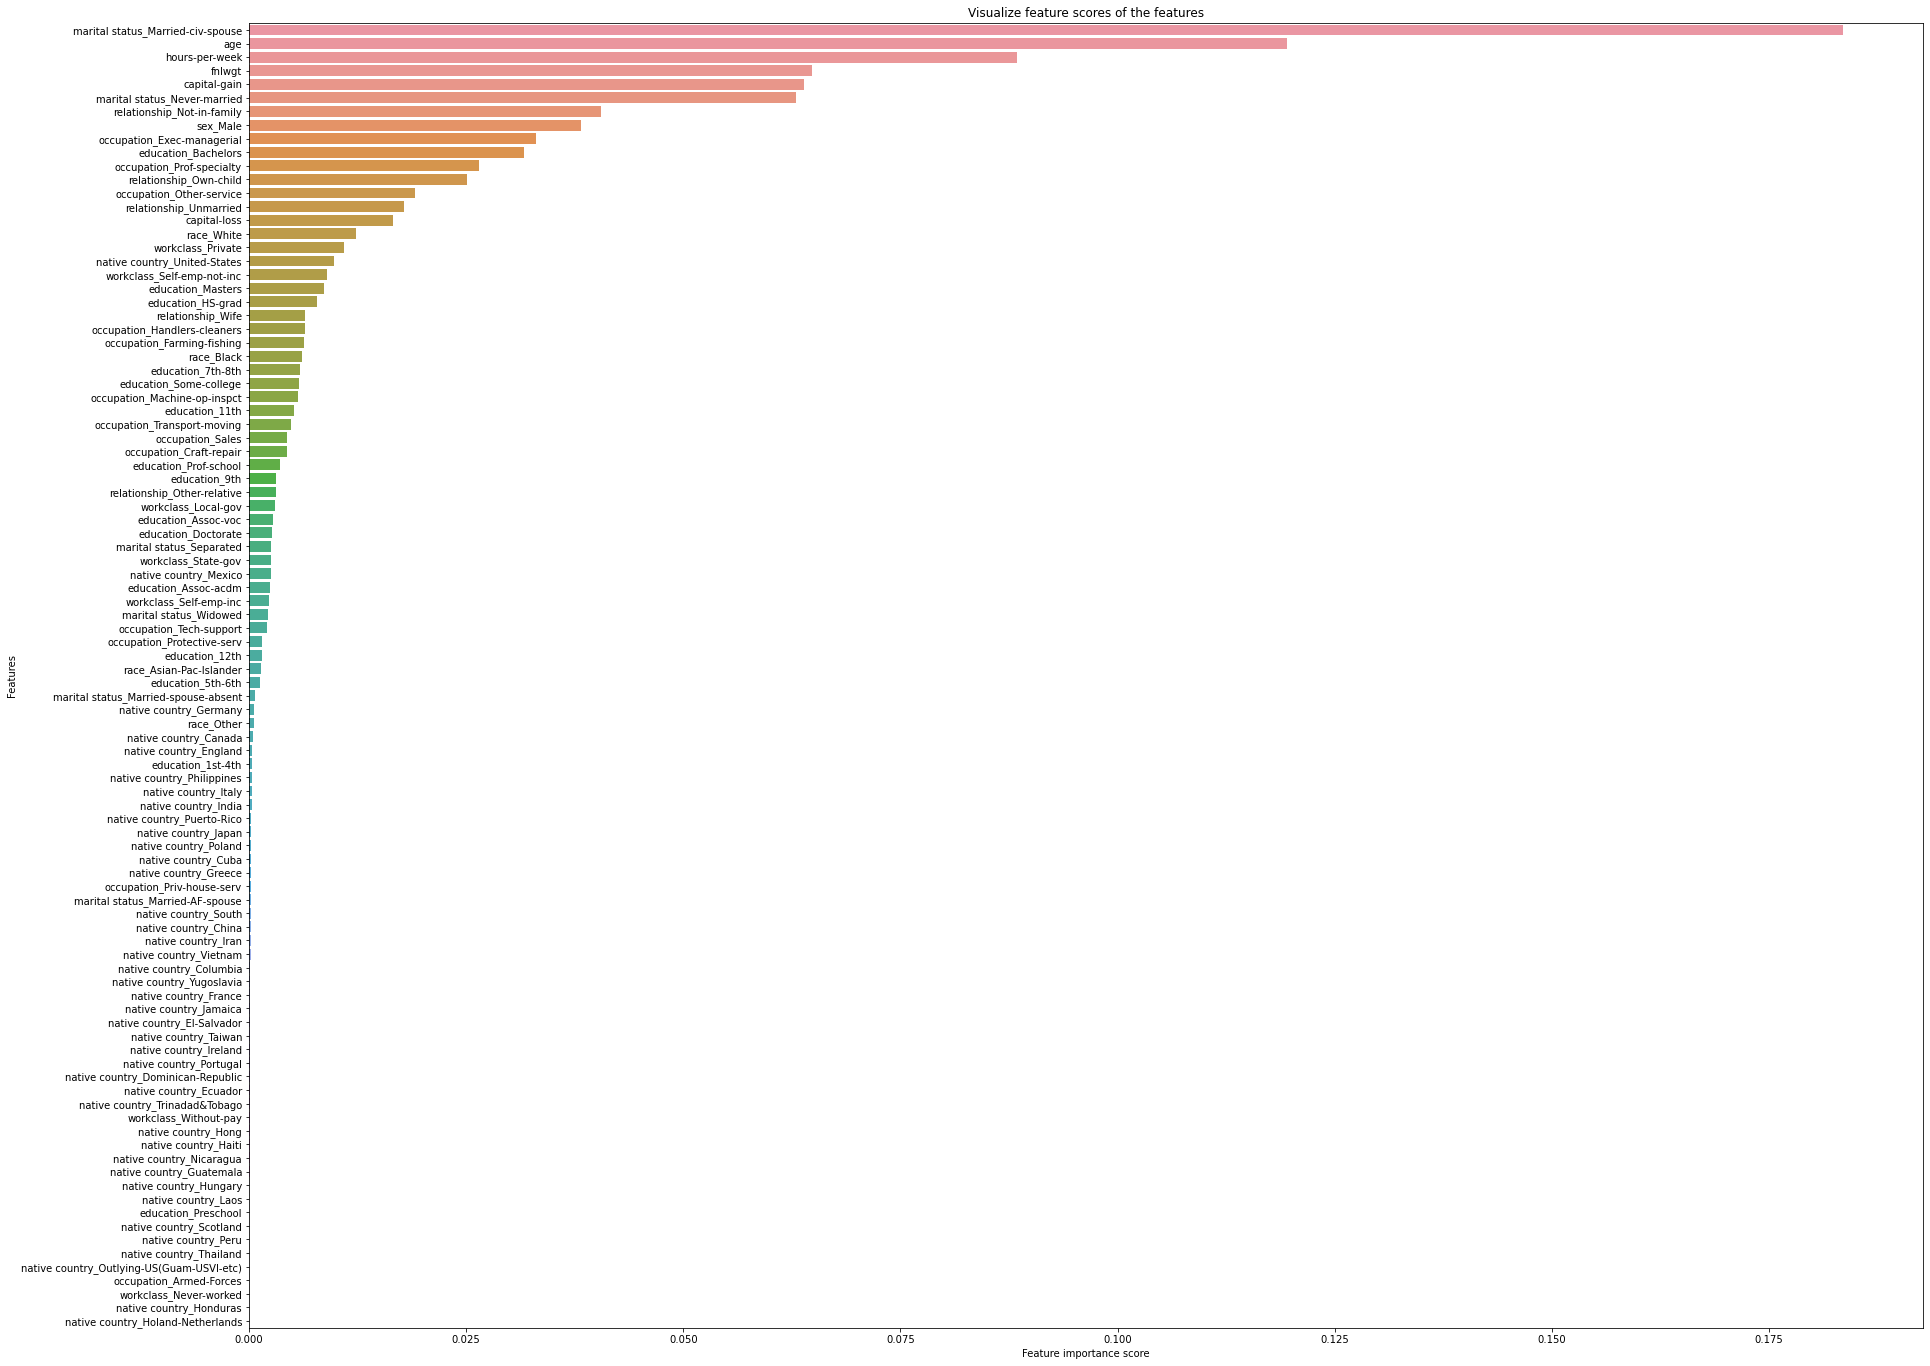

In [77]:
#create a seaborn bar plot
f,ax = plt.subplots(figsize=(30,24))
ax = sns.barplot(x = feature_scores, y=feature_scores.index,data = df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

The Gini index(measure of impurity) is decreased by a major amount by splitting over the marital status , averaged over all trees.

# Xgboost <a class="anchor" id="section_5"></a>

In [86]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [78]:
import xgboost as xgb
#model with some personalized hyperparameter setting
hyp_par_xgb = xgb.XGBClassifier(seed=40,learning_rate=0.2,n_estimators=300,max_depth=4,gamma=1,subsample=0.9, colsample_bytree=0.9)

In [79]:
hyp_par_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [80]:
hyp_par_xgb.fit(x_train,y_train,early_stopping_rounds=10,eval_set=[(x_test,y_test)],eval_metric='aucpr')

[0]	validation_0-aucpr:0.88540
[1]	validation_0-aucpr:0.90417
[2]	validation_0-aucpr:0.91411
[3]	validation_0-aucpr:0.92014
[4]	validation_0-aucpr:0.92837
[5]	validation_0-aucpr:0.93129
[6]	validation_0-aucpr:0.93357
[7]	validation_0-aucpr:0.93564
[8]	validation_0-aucpr:0.93769
[9]	validation_0-aucpr:0.93832
[10]	validation_0-aucpr:0.93991
[11]	validation_0-aucpr:0.94103
[12]	validation_0-aucpr:0.94098
[13]	validation_0-aucpr:0.94122
[14]	validation_0-aucpr:0.94230
[15]	validation_0-aucpr:0.94391
[16]	validation_0-aucpr:0.94425
[17]	validation_0-aucpr:0.94466
[18]	validation_0-aucpr:0.94565
[19]	validation_0-aucpr:0.94644
[20]	validation_0-aucpr:0.94658
[21]	validation_0-aucpr:0.94797
[22]	validation_0-aucpr:0.94837
[23]	validation_0-aucpr:0.94886
[24]	validation_0-aucpr:0.94955
[25]	validation_0-aucpr:0.94981
[26]	validation_0-aucpr:0.95027
[27]	validation_0-aucpr:0.95038
[28]	validation_0-aucpr:0.95059
[29]	validation_0-aucpr:0.95085
[30]	validation_0-aucpr:0.95142
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

We can see that after building 290 trees it didn't notice any significant improvement in AUC score which is based on how it works with the test dataset. So, it created 10 more trees and then stopped.

### model fitting on train data 

In [88]:
accuracy_score(y_train,hyp_par_xgb.fit(x_train,y_train).predict(x_train))

0.9129180151024812

In [89]:
# fitting on test data
accuracy_score(y_test,hyp_par_xgb.fit(x_train,y_train).predict(x_test))

0.8953883495145631

## Hyperparameter tuning <a class="anchor" id="section_5_1"></a>

In [81]:
hyp_par_xgb_2 = RandomizedSearchCV(hyp_par_xgb,{
    'gamma':[0,0.25,1],
    'max_depth':[3,5,7],
    'n_estimators':[100,200,300,400,500],
    'learning_rate':[0.01,0.05,0.1,0.15],
    'seed':[40],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
},cv = 5,return_train_score=False,n_iter = 20,random_state=True)
hyp_par_xgb_2.fit(df_final_data_sm,df_final_target_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.9,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=1, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.2...
                                           monotone_constraints=None,
                         

### Hyperparameter combinations with the mean test scores <a class="anchor" id="section_5_1_1"></a>

In [82]:
pd.DataFrame(hyp_par_xgb_2.cv_results_)[['param_gamma','param_max_depth','param_n_estimators','param_learning_rate','mean_test_score']]

,param_gamma,param_max_depth,param_n_estimators,param_learning_rate,mean_test_score
0,0,7,300,0.05,0.887197
1,0.25,7,300,0.01,0.872472
2,0.25,7,100,0.1,0.884608
3,0,7,100,0.15,0.886610
4,0,3,500,0.01,0.862075
5,0.25,3,100,0.1,0.872836
6,0,3,500,0.01,0.862237
7,0,7,200,0.05,0.884385
8,1,3,200,0.05,0.873766
9,1,7,400,0.01,0.875566


### Best set of hyperparameters <a class="anchor" id="section_5_1_2"></a>

In [83]:
hyp_par_xgb_2.best_params_

{'subsample': 0.8,
 'seed': 40,
 'n_estimators': 500,
 'max_depth': 7,
 'learning_rate': 0.15,
 'gamma': 0.25,
 'colsample_bytree': 1.0}

### Optimal model and its accuracy <a class="anchor" id="section_5_2"></a>

In [90]:
opt_hyp_par_xgb = xgb.XGBClassifier(objective = 'binary:logistic',seed = 40,learning_rate=0.15,n_estimators = 400, max_depth = 7,gamma=0.25,colsample_bytree = 1.0,subsample = 0.8)
opt_hyp_par_xgb.fit(x_train,y_train,verbose = True, early_stopping_rounds = 10, eval_set = [(x_test,y_test)],eval_metric='aucpr')

[0]	validation_0-aucpr:0.90812
[1]	validation_0-aucpr:0.92829
[2]	validation_0-aucpr:0.93066
[3]	validation_0-aucpr:0.93539
[4]	validation_0-aucpr:0.93875
[5]	validation_0-aucpr:0.93909
[6]	validation_0-aucpr:0.94207
[7]	validation_0-aucpr:0.94342
[8]	validation_0-aucpr:0.94415
[9]	validation_0-aucpr:0.94424
[10]	validation_0-aucpr:0.94635
[11]	validation_0-aucpr:0.94764
[12]	validation_0-aucpr:0.94876
[13]	validation_0-aucpr:0.94943
[14]	validation_0-aucpr:0.94995
[15]	validation_0-aucpr:0.95059
[16]	validation_0-aucpr:0.95135
[17]	validation_0-aucpr:0.95145
[18]	validation_0-aucpr:0.95196
[19]	validation_0-aucpr:0.95230
[20]	validation_0-aucpr:0.95277
[21]	validation_0-aucpr:0.95383
[22]	validation_0-aucpr:0.95403
[23]	validation_0-aucpr:0.95438
[24]	validation_0-aucpr:0.95451
[25]	validation_0-aucpr:0.95585
[26]	validation_0-aucpr:0.95606
[27]	validation_0-aucpr:0.95650
[28]	validation_0-aucpr:0.95669
[29]	validation_0-aucpr:0.95698
[30]	validation_0-aucpr:0.95711
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### For train data 

In [91]:
accuracy_score(y_train,opt_hyp_par_xgb.fit(x_train,y_train).predict(x_train))

0.9588996763754045

96% of the observations are correctly classified by the model for train dataset.

### For test data 

In [92]:
accuracy_score(y_test,opt_hyp_par_xgb.fit(x_train,y_train).predict(x_test))

0.9006472491909385

Almost 90% of the observations are correctly classified by the model for test dataset.

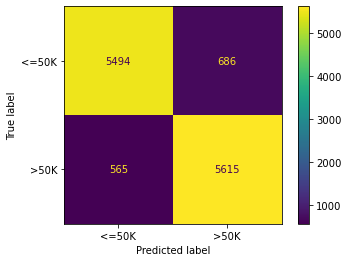

In [87]:
plot_confusion_matrix(opt_hyp_par_xgb,x_test,y_test,display_labels=['<=50K','>50K'])

# Conclusion<a class="anchor" id="section_6"></a>

Based on our data we can say that the XGBoost model predicts the income class of a new individual with approx 90% accuracy.